# Multiple Linear Regression with Melbourne Housing Data

Import modules needed

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

Import Melbourne housing dataset into pandas and see datatypes  
Source: https://www.kaggle.com/anthonypino/melbourne-housing-market/home

In [2]:
df = pd.read_csv('data/Melbourne_housing_FULL.csv')
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Latitude         float64
Longitude        float64
Regionname        object
Propertycount    float64
dtype: object

Keep only columns with numerical data, drop unwanted columns too.

In [3]:
cols = [col for col in df.columns if df[col].dtype != 'object']
df = df[cols]
df = df.drop(labels=['Postcode', 'Propertycount', 'Bedroom2', 'Longitude', 'Latitude'], axis=1)
df.dtypes

Rooms             int64
Price           float64
Distance        float64
Bathroom        float64
Car             float64
Landsize        float64
BuildingArea    float64
YearBuilt       float64
dtype: object

Find percentage of each column that contain NaN values

In [4]:
df.isnull().sum()/df.shape[0]

Rooms           0.000000
Price           0.218321
Distance        0.000029
Bathroom        0.235993
Car             0.250394
Landsize        0.338813
BuildingArea    0.605761
YearBuilt       0.553863
dtype: float64

Drop all houses that don't have associated house price and see proportion of null values in each column

In [5]:
df = df.loc[df['Price'].isnull() == False]
df.isnull().sum()/df.shape[0]

Rooms           0.000000
Price           0.000000
Distance        0.000037
Bathroom        0.236613
Car             0.250450
Landsize        0.340037
BuildingArea    0.608911
YearBuilt       0.556502
dtype: float64

Clean dataset

In [6]:
# Drop all columns with more than 1/4 null values
cols = [col for col in df.columns if df[col].isnull().sum()/df.shape[0] < 0.25]
df = df[cols]

# Drop remaining rows with null values
for col in df.columns:
    df = df.loc[df[col].isnull() == False]

# Rescale the values in the dataframe to normalise data
df2 = (df - df.mean())/(df.max() - df.min())
df2['Price'] = df['Price']

# Insert a column of ones for the theta_0 predictor
df2.insert(0, 'Ones', 1)

# Use only a random sample of 500 rows
df2 = df2.sample(500)

Set X (training data), and y (target variable)

In [7]:
# Target Variable
y_vals = df2['Price']

# Training Data
x_vals = df2[[col for col in df2.columns if col != 'Price']]

# Convert to matrices and initialise theta
x_matrix = np.matrix(x_vals.values)
y_matrix = np.matrix(y_vals.values)
predictor_matrix = np.matrix(np.array([0]*4))

Gradient descent function

In [8]:
def gradDesc(x, y, theta, alpha, iterations):
    # Create a temporary matrix for new set of predictors
    temp = np.matrix(np.zeros(theta.shape))
    # Number of predictors
    predictors = int(theta.ravel().shape[1])
    # Matrix to store cost over iterations
    cost = np.zeros(iterations)
    
    for i in range(iterations):
        # Compute cost of current theta
        cost[i] = np.sum(np.power((x * theta.T) - y, 2))/(2*len(x))
        
        # Calculate the error using matrix operations
        error = (x * theta.T) - y
        
        for j in range(predictors):
            # Multiply the errors by the j'th column
            # Result is array of partial derivative of errors for every j
            term = np.multiply(error, x[:,j])
            
            # Move down the gradient by using partial derivatives and previous theta terms
            temp[0, j] = theta[0, j] - ((alpha/len(x)) * np.sum(term))
            
        # Update all the predictors to the new values at once
        theta = temp
    return theta, cost

Predict co-efficients of linear regression using gradient descent, learning rate of 0.0001 and 1000 iterations.  
Plot the cost over time.

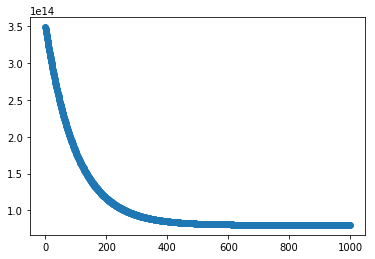

In [9]:
alpha = 0.00001
iters = 1000
prediction, cost_hist = gradDesc(x_matrix, y_matrix, predictor_matrix, alpha, iters)
plt.scatter(list(range(iters)), cost_hist)